#Matplotlib rcParams

rcParams in Matplotlib are essentially the base settings that all plots made with Matplotlib will use when generating a plot.

You can adjust various visual aspects (colour, linetype, text, layout parameters etc.) directly in the code used to generate the plot. However, this can results in excessive unreadable code, and often requires constantly repeating the same code.

This makes the code prone to errors and harder to debug. There is a reason the acronym DRY (Don't Repeat Yourself) exists in software development, and it applies here too.

Fortunately, it is possible to adjust the rcParams either using a base config file, or even locally within the code. This helps keep styles and setup consistent within a particular project, and even across projects. It also greatly reduces the code that needs to be written, or repeated.

# General imports

In [ ]:
# General imports
import os
import urllib.request
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from cycler import cycler

# Matplotlib imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

# For reloading libraries on demand
from importlib import reload

# Download and load data into DataFrame

In [ ]:
data_url = "https://raw.githubusercontent.com/thetestspecimen/notebooks/main/datasets/earnings_syn/earnings.csv"
urllib.request.urlretrieve(data_url, 'earnings.csv')

('earnings.csv', <http.client.HTTPMessage at 0x7c34f3b1b100>)

In [ ]:
earnings = pd.read_csv('earnings.csv')

In [ ]:
earnings

,age,field,experience,earnings
0,41,Creative,23,50900
1,52,Technical,15,17900
2,42,Creative,23,9200
3,33,Technical,13,26300
4,59,Technical,34,108500
...,...,...,...,...
95,26,Creative,8,12200
96,38,Creative,20,29300
97,33,Technical,5,22100
98,58,Creative,25,13100


# A simple baseline plot

The idea of this plot is to show the standard output of Matplotlib with minimal adjustments to style in the code.

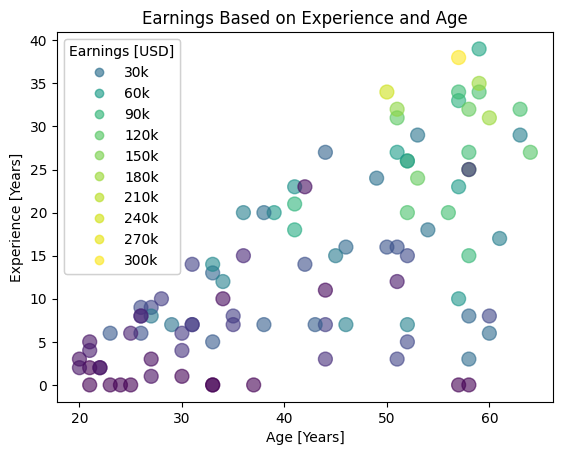

In [ ]:
# Create the figure - some opacity and scaling has been applied
fig, ax = plt.subplots()
scatter = ax.scatter(earnings['age'], earnings['experience'], c=earnings['earnings'], s=100, alpha=0.6, norm='log')
ax.set_title('Earnings Based on Experience and Age')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('Experience [Years]')

# Add the colour Legend
kw = {"fmt":"{x:2g}k", "func":lambda s: s/1000}
colour_legend = ax.legend(*scatter.legend_elements(**kw), title="Earnings [USD]")
ax.add_artist(colour_legend)

plt.show()

There is absolutely nothing wrong with the plot above, but let's assume that it is not to our liking and we want to add our own styling.

This will first be done directly in code. Comments will be added so it is clear exactly what is going on with the styling.

# Adding some style in the code

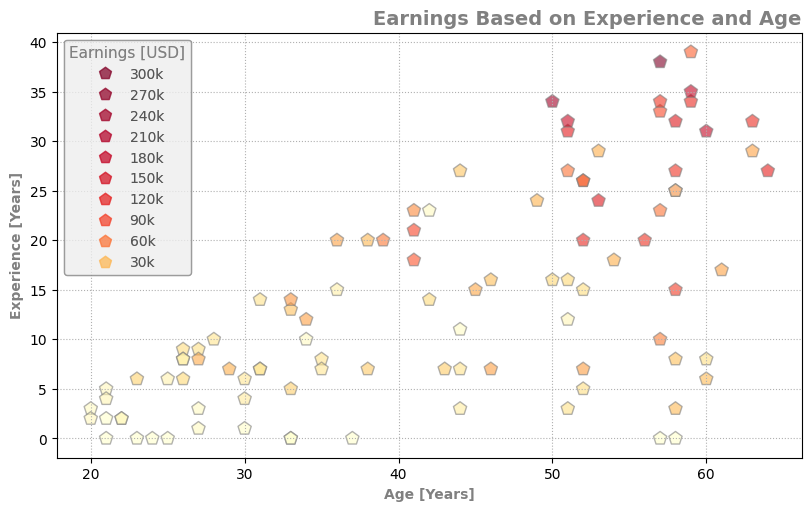

In [ ]:
# CREATE FIGURE

# Change the figure size and dpi of the plot. Turn on constrained layout.
fig, ax = plt.subplots(figsize=(8,5), dpi=100, constrained_layout= True)

# Set the markers to pentagons, the marker colour map to Yellow-Orange-Red, and the marker edge colour to gray
scatter = ax.scatter(earnings['age'], earnings['experience'], c=earnings['earnings'], s=100, alpha=0.6, norm='log', cmap="YlOrRd",  edgecolors= 'Gray', marker='p')

# Turn on major grid lines on both the x-axis and y-axis, and set the grid lines linetype to dotted
ax.grid(True, axis='both', which='major', linestyle='dotted')

# Set the title location (right hand side), fontsize, fontweight, and colour
ax.set_title('Earnings Based on Experience and Age', loc='right', fontsize=14, fontweight='bold', color='Gray')

# Set the x and y labels fontweight and colour
ax.set_xlabel('Age [Years]', fontweight='bold', color="Gray")
ax.set_ylabel('Experience [Years]', fontweight='bold', color="Gray")

# ADD LEGEND

# Set the scaling of the USD amounts so they are in thousands
# Add string formatting to add the 'k' to the tail of the number
kw = {"fmt":"{x:2g}k", "func":lambda s: s/1000}

# Reverse the legend order (large [top] to small [bottom])
# Change the legend marker scale
# Change the legend frame facecolour, edgecolour, and transparency
colour_legend = ax.legend(*scatter.legend_elements(**kw), title="Earnings [USD]", reverse=True, markerscale=1.5, facecolor='#EEEEEE', labelcolor='#555555', edgecolor='#757575', framealpha=0.5)

# Set the legend title colour and font size
title = colour_legend.get_title()
title.set_color("Gray")
title.set_fontsize(11)

# Add the legend to the plot and show the plot
ax.add_artist(colour_legend)
plt.show()

Let's assume this is our ideal styling. It would be great if every matplotlib plot produced from now on retains this styling, without having to write it all out in the code every time. (i.e. apply DRY principles)

## A Quick Note: Resetting rcParams

If rcParams are set in code they are persistent throughout the notebook.

Run the line below at any point to reset the rcParams to their default settings.

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Setting some rcParams

As per the [Matplotlib docs](https://matplotlib.org/stable/users/explain/customizing.html) there are basically three ways to customise Matplotlib:

```
There are three ways to customize Matplotlib:

    1. Setting rcParams at runtime.

    2. Using style sheets.

    3. Changing your matplotlibrc file.

Setting rcParams at runtime takes precedence over style sheets, style sheets take precedence over matplotlibrc files.
```

In this notebook we will primarily set the rcParams in code (i.e. 1. Setting rcParams at runtime.), mainly for convenience so you can see what is happening and follow along.

However, the best, and most logical, way to set the rcParams is to create a text file in the working/project directory, and Matplotlib will automatically load it when the project is run (i.e. 3. Changing your matplotlibrc file.)

At the end of this workbook I will go through how to set a text file up, and the options for where it can be placed. I will also detail where to get a template file.

However, for the moment the rcParams will be set in their own cell before any code for producing a plot. This is mainly for visibility, but the text file is what I would recommend you eventually use.

## What about stylesheets?

The stylesheets are basically the same as rcParams, but limited:

```
A style sheets looks the same as a matplotlibrc file, but in a style sheet you can only set rcParams that are related to the actual style of a plot.
```
Stylesheets have their uses, but for simplicity we will skip over them in this notebook. If you know how to use rcParams, you can also use stylesheets with ease.

In [ ]:
# Initial rcParams to replicate the styling of the previous plot
# ...remember this code would typically be in a text file, not here in a code block
mpl.rcParams['figure.figsize'] = 8,5
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.constrained_layout.use'] = True

mpl.rcParams['text.color'] = 'Gray'

mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'both'
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.labelcolor'] = 'Gray'
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titlelocation'] = 'right'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlecolor'] = 'Gray'

mpl.rcParams['grid.linestyle'] = 'dotted'

mpl.rcParams['image.cmap'] = 'YlOrRd'

mpl.rcParams['scatter.edgecolors'] = 'Gray'
mpl.rcParams['scatter.marker'] = 'p'

mpl.rcParams['legend.markerscale'] = 1.5
mpl.rcParams['legend.edgecolor'] = '#757575'
mpl.rcParams['legend.facecolor'] = '#EEEEEE'
mpl.rcParams['legend.framealpha'] = 0.5
mpl.rcParams['legend.labelcolor'] = '#555555'
mpl.rcParams['legend.title_fontsize'] = 11

# the font parameter below is a default value (i.e. it doesn't change anything
# at the moment), but it is an interesting item to change, so go ahead
# and experiment if you like
mpl.rcParams['font.family'] = "sans-serif" # Options: 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'

Now that the rcParams are set it is possible to revert to the exact code used in the 'simple baseline plot', and the style from the 'styled plot' should be retained.

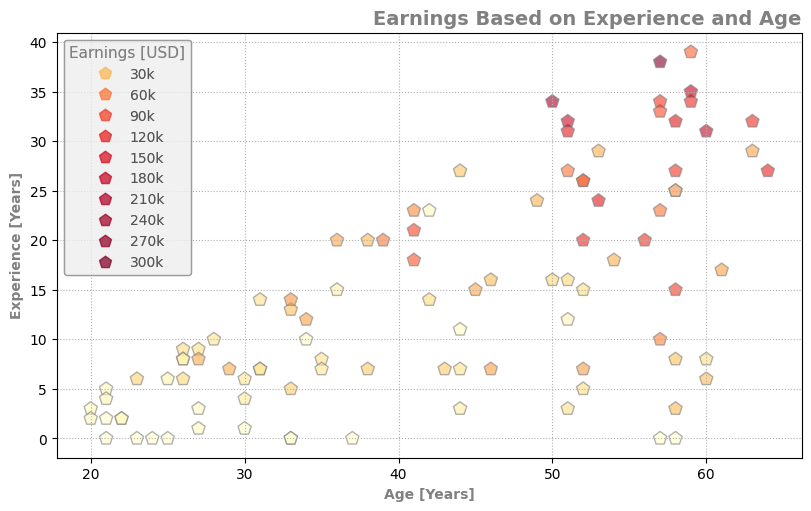

In [ ]:
# Create the figure
fig, ax = plt.subplots()
scatter = ax.scatter(earnings['age'], earnings['experience'], c=earnings['earnings'], s=100, alpha=0.6, norm='log')
ax.set_title('Earnings Based on Experience and Age')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('Experience [Years]')

# Add the colour Legend
kw = {"fmt":"{x:2g}k", "func":lambda s: s/1000}
colour_legend = ax.legend(*scatter.legend_elements(**kw), title="Earnings [USD]")
ax.add_artist(colour_legend)

plt.show()

...so there you have it. The exact same styling without including any styling information in the actual code.

It keeps the code nice and concise, and there is no danger of missing a styling parameter in a later plot as this is now the 'base' matplotlib styling.

# Other rcParams and where to find them

The rcParams set so far are general layout parameters, and those related to scatter plots. So what about other plot types? And where are these parameters coming from?

There is actually a base rcParams file that has every single rcParam laid out in it with all the default values already set. The file also contains extensive instructions on what values are possible to apply.

That particular file should not be changed, but it can be copied into the local directory and changed, and Matplotlib will automatically pick it up (How to do this will be covered later in the notebook).

If you want to view the contents of the template file in a browser for reference you can see it here (at the bottom on the page):

https://matplotlib.org/stable/users/explain/customizing.html

What I want to mention for now is the list of sections detaled in the file as it gives a good overview and what can be adjusted:

```
Matplotlib configuration are currently divided into following parts:
     - BACKENDS
     - LINES
     - PATCHES
     - HATCHES
     - BOXPLOT
     - FONT
     - TEXT
     - LaTeX
     - AXES
     - DATES
     - TICKS
     - GRIDS
     - LEGEND
     - FIGURE
     - IMAGES
     - CONTOUR PLOTS
     - ERRORBAR PLOTS
     - HISTOGRAM PLOTS
     - SCATTER PLOTS
     - AGG RENDERING
     - PATHS
     - SAVING FIGURES
     - INTERACTIVE KEYMAPS
     - ANIMATION
```

That gives a lot of options. Let's take a further look into some other areas.

# Lineplots

Lineplots are another basic plot type, and differ in one major way to a scatterplot when it comes to rcParams: **Colour**

For the scatterplot a preferred 'image.cmap' was set as 'YlOrRd'. Setting this 'image.cmap' parameter allowed a personlised colour mapping to be applied to the scatter plot.

However, when it comes to the colours used in a lineplot, a different parameter must be adjusted: 'axes.prop_cycle'. This is because lineplots 'cycle' through a list of colours as you add more lines to the plot. This requires an array of colours to be specified if you want to customise the colours subsequent lines will be drawn with.

Matplotlib by default is set to 'tab10' for 'axes.prop_cycle':

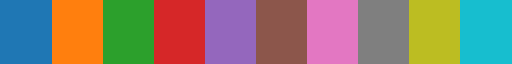

In [ ]:
mpl.colormaps["tab10"]

...so let's select a different set of colours and assign them using rcParams later.

How about 'Dark2':

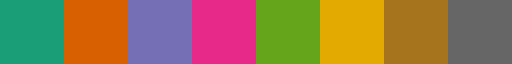

In [ ]:
mpl.colormaps["Dark2"]

In [ ]:
# Extract the colours from the colourmap and change to hex codes
cmap = mpl.colormaps["Dark2"]
colours = cmap(np.linspace(0,1,8))
hex_colours = [mpl.colors.to_hex(colour) for colour in colours]
hex_colours

['#1b9e77',
 '#d95f02',
 '#7570b3',
 '#e7298a',
 '#66a61e',
 '#e6ab02',
 '#a6761d',
 '#666666']

## Create data for the lineplot

In [ ]:
# Create some basic data for 4 lines
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)/27
y4 = np.arctan(x)

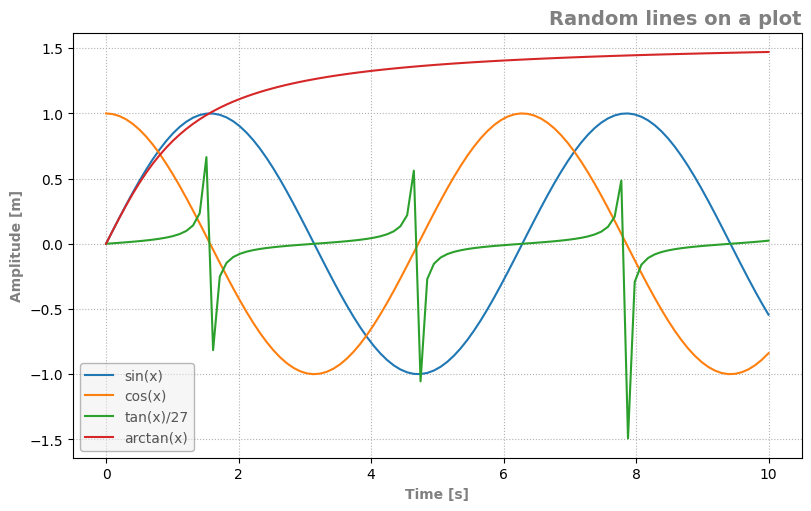

In [ ]:
# Plot a line chart without any styling data
# As general rcParams were set for the scatterplot
# we would expect that styling to apply here too.
fig, ax = plt.subplots()
ax.plot(x,y1, label="sin(x)")
ax.plot(x,y2, label="cos(x)")
ax.plot(x,y3, label="tan(x)/27")
ax.plot(x,y4, label="arctan(x)")
ax.set_title('Random lines on a plot')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [m]')
ax.legend()
plt.show()

The styling of the plot is indeed the same as the scatterplot without specifying any styling information in the code.

The 'colour cycler' is set to 'tab10' which is the Matplotlib default, so let's add in some additional styling using rcParams on the colour cycler and 'lineplot' specific settings.

In [ ]:
# Assign 'Dark2' colour scheme
# Note: you could use the variable 'hex_colours' which was set earlier instead
# of the array of hex codes, but this will not work in the text file later.
# Note: you could literally specify random hex codes here, it doesn't have to
# follow a Matplotlib preset cmap like 'Dark2', and as many as you want not just 8...
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666'])

# Change the line style
mpl.rcParams['lines.linewidth'] = 3.0
mpl.rcParams['lines.linestyle'] = 'dashdot'
mpl.rcParams['lines.dash_capstyle'] = 'projecting'

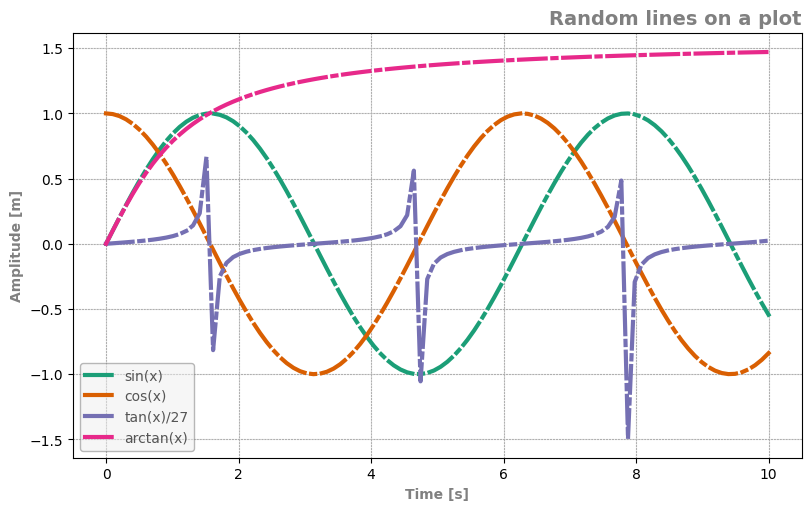

In [ ]:
# Run the exact same code, and see the style changes
fig, ax = plt.subplots()
ax.plot(x,y1, label="sin(x)")
ax.plot(x,y2, label="cos(x)")
ax.plot(x,y3, label="tan(x)/27")
ax.plot(x,y4, label="arctan(x)")
ax.set_title('Random lines on a plot')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [m]')
ax.legend()
plt.show()

# Multiple plots and overriding rcParam values

The styling will also carry over to multiple plots

In [ ]:
# one rcParam for the main figure title, which hasn't been used up until now
# as it only appears on plots with multiple graphs
mpl.rcParams['figure.titlesize'] = 20

## Overrinding values

One of the things to remember is the rcParams are 'base' values, even when they are set explicitly by the user as we have been doing. This means they can be overridden in code.

This is demonstrated below by overriding the figure size.

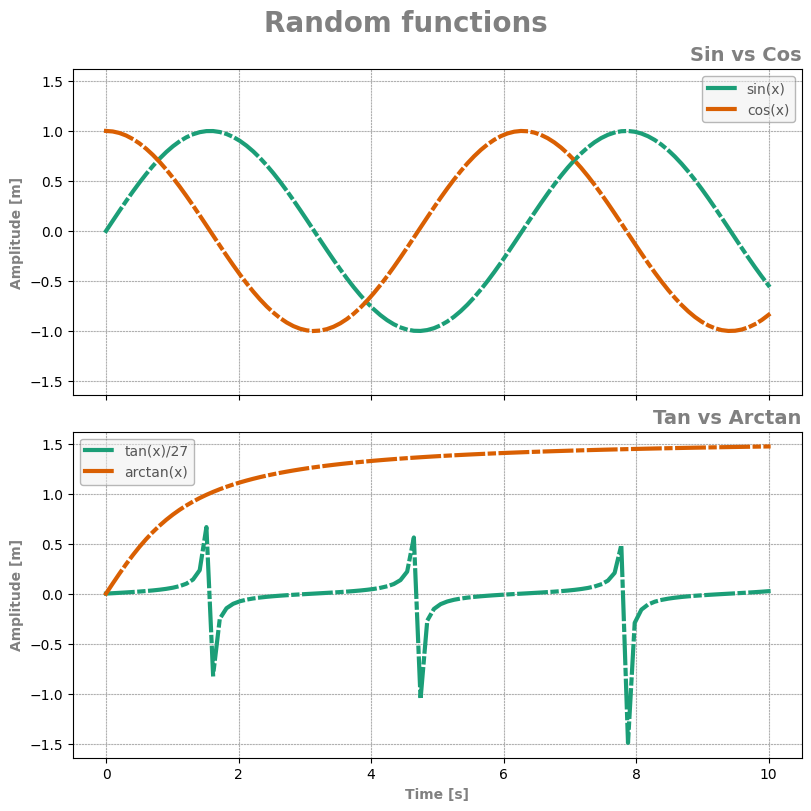

In [ ]:
# create plot - note that figsize is explicitly defined as (8,8)
# rather than the original (8,5) in the rcParams
fig, axs = plt.subplots(2,1, figsize=(8,8), sharey=True)
fig.suptitle('Random functions')
axs[0].plot(x,y1, label="sin(x)")
axs[0].plot(x,y2, label="cos(x)")
axs[1].plot(x,y3, label="tan(x)/27")
axs[1].plot(x,y4, label="arctan(x)")

axs[0].set_title('Sin vs Cos')
axs[1].set_title('Tan vs Arctan')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Amplitude [m]')
    ax.label_outer()
    ax.legend()

plt.show()

As you can see the plots retain all the previously applied styling, and the figure size has been overridden locally to better display the multiple plots.

# Boxplots

As a final example we will take a look at boxplots. This is mainly as it is one of the most extensive sections in the rcParams file. However, it is still easy to adjust due to the excellent layout of the rcParams default text file.

Let's start with an unconfigured version.

In [ ]:
# extract data into the correct format for plotting and extract labels for categories
fields = earnings.field.unique()
field_array = [earnings.loc[earnings['field'] == field, 'earnings'] for field in fields]

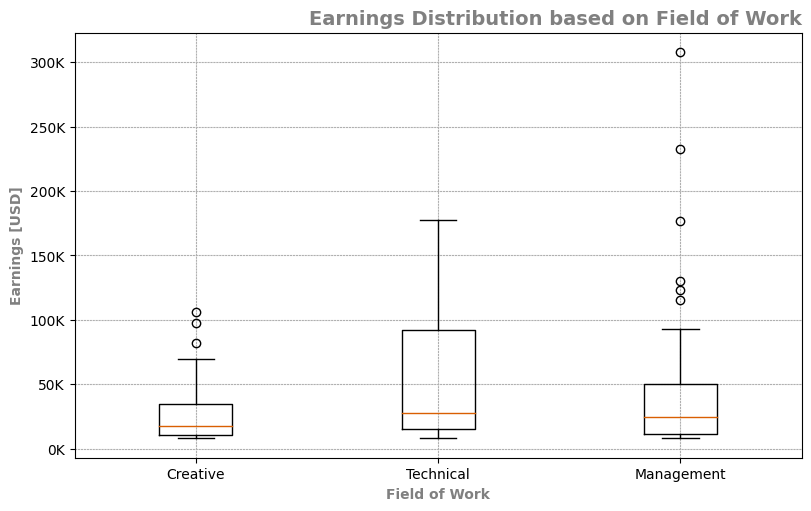

In [ ]:
# plot the data onto a boxplot
fig, ax = plt.subplots()
boxplot = ax.boxplot(field_array, labels=fields)
ax.set_title('Earnings Distribution based on Field of Work')
ax.set_xlabel('Field of Work')
ax.set_ylabel('Earnings [USD]')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{data:g}K'.format(data=x/1000)))
plt.show()

Again, the previously set styling is retained, but the boxplots themselves are styled based on Matplotlib defaults. Let's add some personal style to the boxplots using rcParams.

In [ ]:
mpl.rcParams['boxplot.patchartist'] = True
mpl.rcParams['boxplot.showmeans'] = True

mpl.rcParams['boxplot.flierprops.marker'] = 'D'
mpl.rcParams['boxplot.flierprops.markerfacecolor'] = 'C1'
mpl.rcParams['boxplot.flierprops.markeredgecolor'] = 'w'
mpl.rcParams['boxplot.flierprops.markersize'] = '7'

mpl.rcParams['boxplot.boxprops.color'] = 'C0'

mpl.rcParams['boxplot.whiskerprops.color'] = 'C0'
mpl.rcParams['boxplot.whiskerprops.linewidth'] = 2.0
mpl.rcParams['boxplot.whiskerprops.linestyle'] = (0, (1, 3))

mpl.rcParams['boxplot.capprops.color'] = 'C0'
mpl.rcParams['boxplot.capprops.linewidth'] = 2.0

mpl.rcParams['boxplot.medianprops.color'] = 'w'
mpl.rcParams['boxplot.medianprops.linewidth'] = 2.0
mpl.rcParams['boxplot.medianprops.linestyle'] = (0, (0.5, 1.5))

mpl.rcParams['boxplot.meanprops.marker'] = 'D'
mpl.rcParams['boxplot.meanprops.markerfacecolor'] = 'C5'
mpl.rcParams['boxplot.meanprops.markeredgecolor'] = 'w'
mpl.rcParams['boxplot.meanprops.markersize'] = 7
mpl.rcParams['boxplot.meanprops.linestyle'] = 'none'

One thing to note in the above is how the colours are specified.

```
mpl.rcParams['boxplot.meanprops.markerfacecolor'] = 'C5'
```
What does the C5 mean?

Well this comes back to the 'axes.prop_cycle' array of colours that were set for the line plots. In our case 'Dark2':

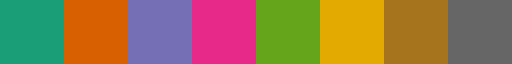

In [ ]:
mpl.colormaps["Dark2"]

C5 means the sixth colour along (due to zero indexing). So should be the colour yellow. So in our case the ```'boxplot.meanprops.markerfacecolor'``` should be yellow when we run the next plot.

For more information on the many ways to specify colour in matplotlib, please refer to the following:

https://matplotlib.org/stable/users/explain/colors/colors.html

...so let's see the styled plot.

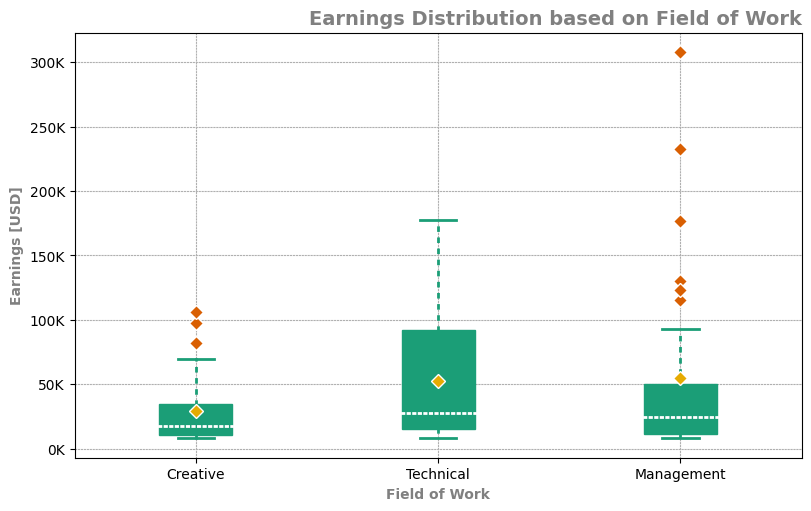

In [ ]:
# plot the data onto a boxplot
fig, ax = plt.subplots()
boxplot = ax.boxplot(field_array, labels=fields)
ax.set_title('Earnings Distribution based on Field of Work')
ax.set_xlabel('Field of Work')
ax.set_ylabel('Earnings [USD]')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{data:g}K'.format(data=x/1000)))
plt.show()

## A quick note --> Boxplots using Pandas

Using Pandas directly to plot the boxplot is easier than using Matplotlib as there is no requirement to reconfigure the data before plotting.

However, Pandas appears to have bugs in relation to rcParams, and therefore the colour of the caps ```boxplot.capprops.color``` and the median line ```boxplot.medianprops.color``` are not set correctly.

See here for more info on the bug, which appears to be over 5 years old!:

https://stackoverflow.com/questions/51871585/set-boxplot-parameters-in-mplstyle-or-matplotlibrc

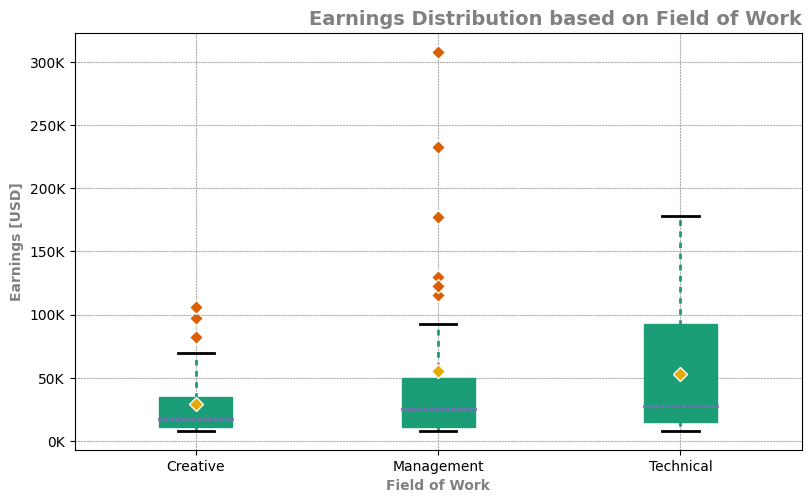

In [ ]:
fig, ax = plt.subplots()
earnings.boxplot(column=['earnings'], by='field', ax=ax)
ax.set_title('Earnings Distribution based on Field of Work')
ax.set_xlabel('Field of Work')
ax.set_ylabel('Earnings [USD]')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{data:g}K'.format(data=x/1000)))
plt.suptitle('')
plt.show()

The caps are black and the median lines are purple! Definitely not what was set in rcParams.

# The rcParams text config file

Now that a set of rcParams have been created throughout this workbook it would be a good idea to collate them and apply them in a text file.

## Where can I find a template file?

There are basically two places:

1. Locally on your computer (i.e. it comes with the Matplotlib library)
2. From the matplotlib docs online (https://matplotlib.org/stable/users/explain/customizing.html)

Locally, the path of the default matplotlib rcParams file. (Note: this code tells you the location of the rcParams file that is being used now. So in this case it shows the default file)

In [ ]:
template_mplrc_file = mpl.matplotlib_fname()
template_mplrc_file

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'

However, you should never work directly on this file as it has the base default settings for Matplotlib.

What you should do is copy it somewhere else to work on it. Matplotlib will then pick this copied file up when starting the project, as long as you put it in one of the designated locations. As per the docs:

```
The matplotlibrc is read at startup to configure Matplotlib. Matplotlib looks for matplotlibrc in four locations, in the following order:

    1. matplotlibrc in the current working directory, usually used for specific customizations that you do not want to apply elsewhere.

    2. $MATPLOTLIBRC if it is a file, else $MATPLOTLIBRC/matplotlibrc.

    3. It next looks in a user-specific place, depending on your platform:

        On Linux and FreeBSD, it looks in .config/matplotlib/matplotlibrc (or $XDG_CONFIG_HOME/matplotlib/matplotlibrc) if you've customized your environment.

        On other platforms, it looks in .matplotlib/matplotlibrc.

    See matplotlib configuration and cache directory locations.

    4. INSTALL/matplotlib/mpl-data/matplotlibrc, where INSTALL is something like /usr/lib/python3.9/site-packages on Linux, and maybe C:\Python39\Lib\site-packages on Windows. Every time you install matplotlib, this file will be overwritten, so if you want your customizations to be saved, please move this file to your user-specific matplotlib directory.

Once a matplotlibrc file has been found, it will not search any of the other paths. When a style sheet is given with style.use('<path>/<style-name>.mplstyle'), settings specified in the style sheet take precedence over settings in the matplotlibrc file.
```

The simplest and most convenient option is number 1: in the current working directory.

This has the advantage of being easy to access and edit, whilst also allowing you to ship the rcParams with whatever project you are working on. This means everybody will see the same consistent layout of plots if they use your project.

This is how you could copy the file to your working directory:

In [ ]:
!cp $template_mplrc_file ./

## Check the new file is being used in the local path

If you check your local project directory you should now see a new file called 'matplotlibrc'.

It is also possible to check if matplotlib is using this file by running this code again:

In [ ]:
mpl.matplotlib_fname()

'matplotlibrc'

Note that the path has changed to just the filename, which indicates it is being picked up in our working directory. Perfect.

Just to confirm let's delete the file and check the path again. It should revert to the default path.

In [ ]:
!rm ./matplotlibrc
mpl.matplotlib_fname()

'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc'

# Using a pre-configured rcParams file (as an example)

As a final step to demonstrate the use of the rcParams file we will:

1. Reset all the rcParams set locally in the code
2. Load the final boxplots chart to see it is on default settings
3. Download a pre-setup rcParams file into the local directory which contains all the settings generated in this notebook so far
4. Check matplotlib 'sees' the local rcParams file
5. Reload the Matplotlib library to load in the new local matplotlibrc file
6. Load the boxplots chart again (with the same code as point 2.) and see if the layout settings are returned.



In [ ]:
# 1. Reset rcParams
mpl.rcParams.update(mpl.rcParamsDefault)

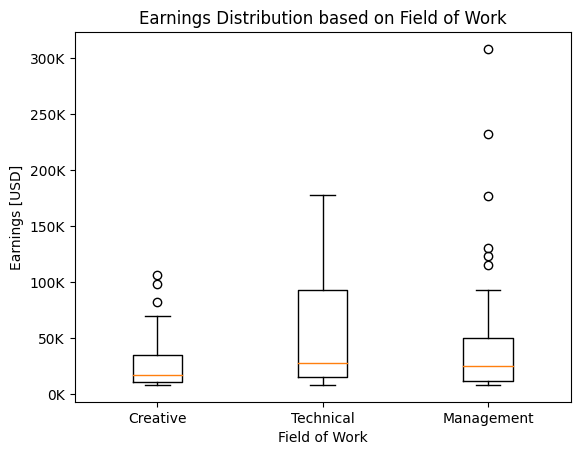

In [ ]:
# 2. Plot the final boxplot chart
fig, ax = plt.subplots()
boxplot = ax.boxplot(field_array, labels=fields)
ax.set_title('Earnings Distribution based on Field of Work')
ax.set_xlabel('Field of Work')
ax.set_ylabel('Earnings [USD]')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{data:g}K'.format(data=x/1000)))
plt.show()

In [ ]:
# 3. Download a pre-setup rcParams file which contains the settings
#    from this notebook
data_url = "https://raw.githubusercontent.com/thetestspecimen/notebooks/main/matplotlib-rcparams/matplotlibrc"
urllib.request.urlretrieve(data_url, 'matplotlibrc')

('matplotlibrc', <http.client.HTTPMessage at 0x7c34ee836f80>)

In [ ]:
# 4. Check that matplotlib 'sees' the local params file
mpl.matplotlib_fname()

'matplotlibrc'

In [ ]:
# 5. Reload the Matplotlib library to force loading in the new local 'matplotlibrc' params file
reload(mpl)

<module 'matplotlib' from '/usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py'>

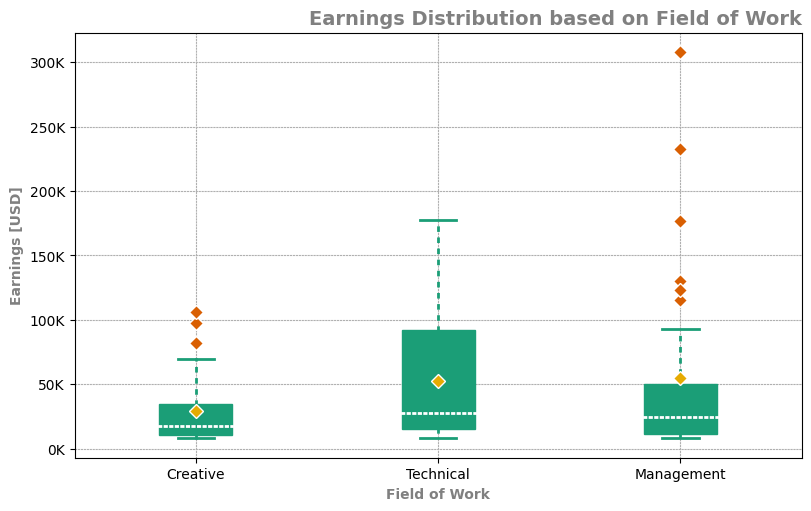

In [ ]:
# 6. Reload the boxplot, this time using the settings in the local rcParams file (hopefully!)
fig, ax = plt.subplots()
boxplot = ax.boxplot(field_array, labels=fields)
ax.set_title('Earnings Distribution based on Field of Work')
ax.set_xlabel('Field of Work')
ax.set_ylabel('Earnings [USD]')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{data:g}K'.format(data=x/1000)))
plt.show()

...so there you have it.

You can now setup an rcParams file, which is easily transferrable between your projects so your work in matplotlib can be consistent and professional with minimum effort and reduced repitition of the same code.

I would encourage you to review the example file shown at https://matplotlib.org/stable/users/explain/customizing.html to familiarise yourself with what is possible.

This notebook has only scratched the surface of what is possible to setup with rcParams, there is a lot of customisation available.